In [13]:
import numpy as np
import matplotlib.pyplot as plt

pops = np.load("pops.npy")
lev_data = []
levels = np.arange(0,200)
for l in levels:
    temp  = []
    for i in pops:
        temp.append(i[l]) 
    lev_data.append(temp)
print(len(lev_data[160]))

30


In [2]:
def kernel(x_i, x_j, h):
    X_i, X_j = np.meshgrid(x_i, x_j)
    return alpha**2 * np.exp(-0.5 * (X_i-X_j)**2 / h**2)

N = 31
x_min = 0.0
x_max = 30.0

x = np.linspace(x_min, x_max, N)
print((x))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]


In [3]:
lev_predictions = []
for level_data in lev_data:
    #h = 5.5
    #alpha = .8
    #h = 6.9
    alpha = .01
    h = 2.21#1.90 #5.
    #alpha = 0.7 #.01
    #y = np.arange(0,30,3).tolist()
    #y.append(29)
    
    #y = np.arange(0,30,2).tolist()
    #y.append(29)
    #y.append(1)

    y = np.arange(0,30,1).tolist()
    
    
    y = np.array(y)
    fy = []
    for i in y:
        fy.append(level_data[i])

    mean = np.matmul(np.matmul(kernel(y,x,h), np.linalg.inv(kernel(y,y,h))), fy)
    cov  = kernel(x,x,h) - np.matmul(np.matmul(kernel(y,x,h), np.linalg.inv(kernel(y,y,h))), kernel(x,y,h))
    
    lev_predictions.append(mean)
lev_predictions = np.array(lev_predictions).T

In [4]:
print(np.shape(lev_predictions))

(31, 200)


In [5]:
def max_relative_difference(a, b):
    return np.max(2.0 * np.abs((a - b) / (a + b)))

In [15]:
print(lev_predictions[30,160])

0.8869311993390710594


In [17]:
diff = []
for i in range(0,30):
    max_diff = max_relative_difference(lev_predictions[i+1], lev_predictions[i])
    diff.append(max_diff)
    print('After', i, 'iteration(s), max_diff =', max_diff)

After 0 iteration(s), max_diff = 1.3964876763145382126
After 1 iteration(s), max_diff = 0.52219816373842203926
After 2 iteration(s), max_diff = 0.3004983008573982819
After 3 iteration(s), max_diff = 0.19364638951726786442
After 4 iteration(s), max_diff = 0.12723915824533029218
After 5 iteration(s), max_diff = 0.082887488859272483486
After 6 iteration(s), max_diff = 0.052965400581024714535
After 7 iteration(s), max_diff = 0.033242815719787688025
After 8 iteration(s), max_diff = 0.020636958128351446202
After 9 iteration(s), max_diff = 0.012672505560560300934
After 10 iteration(s), max_diff = 0.0077335154342708797694
After 11 iteration(s), max_diff = 0.0047142213423770038853
After 12 iteration(s), max_diff = 0.0028659877262447170997
After 13 iteration(s), max_diff = 0.0017396210235699621913
After 14 iteration(s), max_diff = 0.0010549783721589928484
After 15 iteration(s), max_diff = 0.000639429722495170019
After 16 iteration(s), max_diff = 0.00038746533588122427125
After 17 iteration(s), m

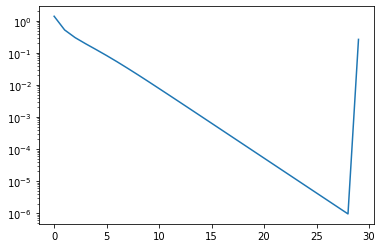

In [8]:
plt.plot(np.arange(0,len(diff)) , diff)
plt.yscale("log")
plt.show()

In [28]:

error = np.abs(lev_predictions[30]- pops[29])
print(error)

[0.00623416 0.01233968 0.0062816  0.01229224 0.0062915  0.01228234
 0.00629482 0.01227901 0.0062965  0.01227734 0.00629796 0.01227587
 0.00629988 0.01227396 0.0063028  0.01227103 0.00630736 0.01226648
 0.00631421 0.01225963 0.00632427 0.01224957 0.00633872 0.01223511
 0.00635871 0.01221513 0.00638566 0.01218818 0.00642107 0.01215277
 0.00646638 0.01210746 0.00652321 0.01205063 0.00659291 0.01198093
 0.00667694 0.0118969  0.00677663 0.01179721 0.00689328 0.01168056
 0.0070282  0.01154564 0.00718268 0.01139115 0.00735808 0.01121576
 0.00755568 0.01101816 0.00777676 0.01079707 0.00802245 0.01055139
 0.00829362 0.01028022 0.0085908  0.00998304 0.00891399 0.00965985
 0.00926252 0.00931132 0.00963485 0.00893898 0.01002853 0.0085453
 0.01043991 0.00813393 0.01086419 0.00770964 0.01129569 0.00727815
 0.01172769 0.00684615 0.01215301 0.00642083 0.01256436 0.00600948
 0.01295483 0.00561901 0.01331849 0.00525535 0.01365047 0.00492337
 0.01394736 0.00462648 0.01420723 0.00436661 0.01442953 0.00414